# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Log-Likelihood Test 

In [2]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Reading the Dataset

### Full Dataset

In [3]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')

data.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Traininig Data

In [4]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop([0], axis=0)
train_df.Date = pd.to_datetime(train_df.Date)
train_df = train_df.set_index('Date')

train_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Testing Data

In [5]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop([0], axis=0)
test_df.Date = pd.to_datetime(test_df.Date)
test_df = test_df.set_index('Date')

test_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,422.435359,437.687083,197.193653,84.943455,-0.193210,-0.527714,-0.650103,0.642878,-32.464781,-41.763021,-334.170049,-3.107073e+10,0.037330,0.422634,0.278482,0.413292
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,424.210046,443.985268,199.374087,84.855945,0.420108,1.105733,1.438970,-0.103022,70.590347,87.507175,739.668688,4.979110e+09,0.176491,2.070634,1.222645,0.010613
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,419.189933,439.239333,198.010573,84.806066,-1.183403,-0.683897,-1.068940,-0.058781,-198.845784,-54.123325,-549.463410,2.840906e+09,1.400442,1.142632,0.467716,0.003455
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,423.492891,437.714524,198.339700,83.953331,1.026494,0.166217,-0.347148,-1.005512,172.480531,13.154331,-178.443043,4.859710e+10,1.053689,0.120511,0.027628,1.011054
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,422.510281,432.852403,197.719656,83.953331,-0.232025,-0.312617,-1.110797,0.000000,-38.986902,-24.740380,-570.979380,-0.000000e+00,0.053836,1.233871,0.097730,0.000000


# ACF and PACF Plot Function

In [6]:
def acf_pacf(series, label_str):
    plt.rcParams['figure.figsize'] = 20, 5
    fig, (ax0, ax1) = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax=ax0)
    ax0.set_title("ACF for "+label_str, size = 20)

    sgt.plot_pacf(series, zero = False, lags = 40, ax=ax1)
    ax1.set_title("PACF for "+label_str, size = 20)

    plt.show()

# ARIMA For SPX Prices

#### ACF and PACF Plots for SPX Prices

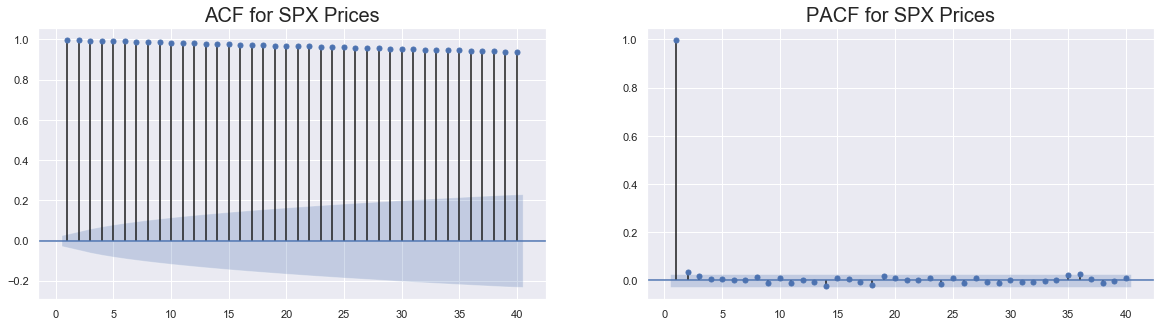

In [7]:
acf_pacf(train_df.spx, "SPX Prices")

#### Function to fit and plot ARIMA Models

In [8]:
def fit_arima_model(train_data, model_name, p, d, q, exog_data=None):
    arima_model = ARIMA(train_data, exog=exog_data, order=(p, d, q))
    arima_model_results = arima_model.fit()
    print("ARIMA(%d, %d, %d) Model" %(p, d, q))
    print(arima_model_results.summary())
    acf_pacf(arima_model_results.resid, model_name)
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    
    return arima_model_results

#### Fitting ARIMA(1, 1, 1)

ARIMA(1, 1, 1) Model
                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 5352
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21365.729
Method:                       css-mle   S.D. of innovations             13.107
Date:                Sun, 14 Jun 2020   AIC                          42739.457
Time:                        16:51:21   BIC                          42765.798
Sample:                    01-07-1994   HQIC                         42748.657
                         - 07-14-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2818      0.148      1.898      0.058      -0.009       0.573
ar.L1.D.spx     0.6144      0.095      6.448      0.000       0.428       0.801
ma.L1.D.spx    -0.6806     

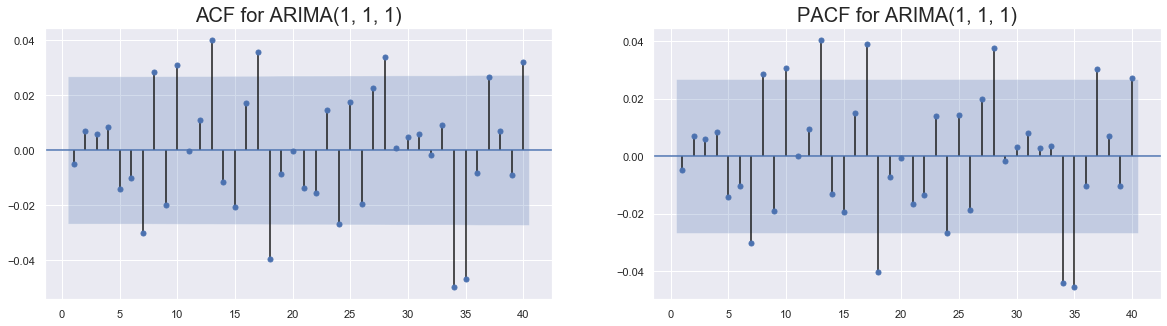

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [9]:
arima_1_1_1_model_results = fit_arima_model(train_df.spx, "ARIMA(1, 1, 1)", 1, 1, 1)

#### Fitting Higher order models

ARIMA(7, 1, 1) Model
                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 5352
Model:                 ARIMA(7, 1, 1)   Log Likelihood              -21357.855
Method:                       css-mle   S.D. of innovations             13.088
Date:                Sun, 14 Jun 2020   AIC                          42735.711
Time:                        16:51:30   BIC                          42801.563
Sample:                    01-07-1994   HQIC                         42758.711
                         - 07-14-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2819      0.147      1.919      0.055      -0.006       0.570
ar.L1.D.spx    -0.6758      0.118     -5.732      0.000      -0.907      -0.445
ar.L2.D.spx    -0.0816     

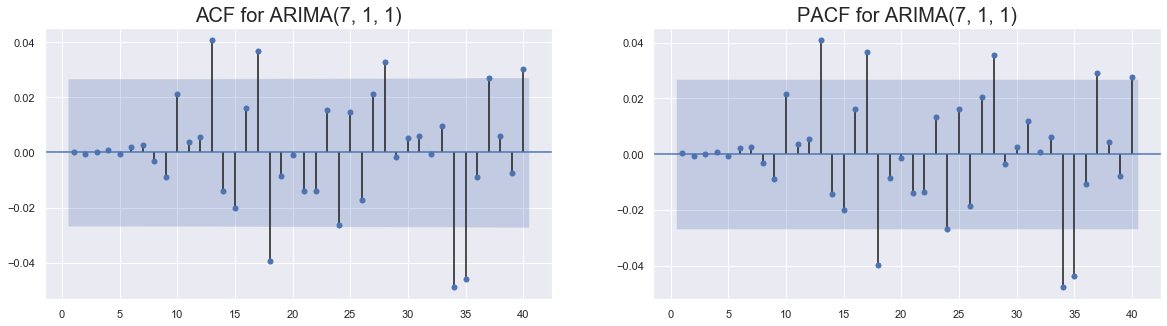

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [10]:
arima_7_1_1_model_results = fit_arima_model(train_df.spx, "ARIMA(7, 1, 1)", 7, 1, 1)

#### LLR Test Between the Fitted Models

In [11]:
LLR_test(arima_1_1_1_model_results, arima_7_1_1_model_results, DF=6)

0.015

#### Predictions using ARIMA(7, 1, 1)

In [12]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [13]:
pred_df = arima_7_1_1_model_results.predict(start = start_date, end = end_date)

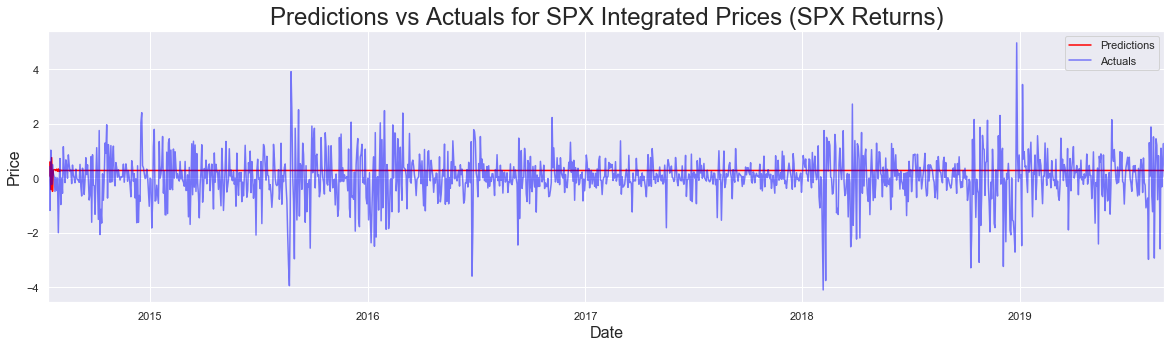

In [14]:
pred_df[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.5)

plt.title("Predictions vs Actuals for SPX Integrated Prices (SPX Returns)", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Price', size=16)

plt.legend()
plt.show()

# ARIMAX For SPX Prices

#### Fitting ARIMAX(1, 1, 1)

In [15]:
train_df.columns

Index(['spx', 'dax', 'ftse', 'nikkei', 'spx_norm', 'dax_norm', 'ftse_norm',
       'nikkei_norm', 'spx_ret', 'ftse_ret', 'dax_ret', 'nikkei_ret',
       'spx_ret_norm', 'ftse_ret_norm', 'dax_ret_norm', 'nikkei_ret_norm',
       'spx_vol', 'dax_vol', 'ftse_vol', 'nikkei_vol'],
      dtype='object')

ARIMA(1, 1, 1) Model
                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 5352
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21365.620
Method:                       css-mle   S.D. of innovations             13.107
Date:                Sun, 14 Jun 2020   AIC                          42741.240
Time:                        16:51:40   BIC                          42774.166
Sample:                    01-07-1994   HQIC                         42752.741
                         - 07-14-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0960      0.430      0.223      0.824      -0.748       0.939
dax          3.557e-05   7.72e-05      0.461      0.645      -0.000       0.000
ar.L1.D.spx     0.6136     

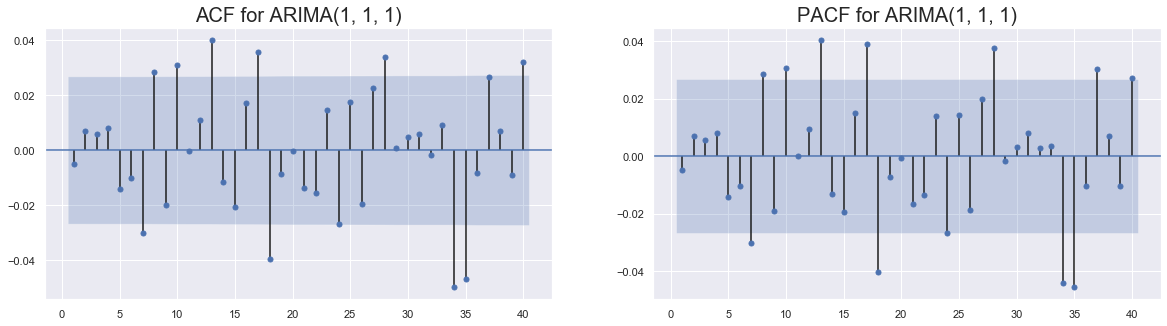

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [16]:
arimax_1_1_1_model_results = fit_arima_model(train_df.spx, "ARIMA(1, 1, 1)", 1, 1, 1, exog_data=train_df.dax)

#### Fitting Higher Order ARIMAX Models

ARIMA(7, 1, 1) Model
                             ARIMA Model Results                              
Dep. Variable:                  D.spx   No. Observations:                 5352
Model:                 ARIMA(7, 1, 1)   Log Likelihood              -21357.746
Method:                       css-mle   S.D. of innovations             13.088
Date:                Sun, 14 Jun 2020   AIC                          42737.492
Time:                        16:51:47   BIC                          42809.930
Sample:                    01-07-1994   HQIC                         42762.793
                         - 07-14-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0902      0.426      0.212      0.832      -0.744       0.924
dax          3.653e-05   7.64e-05      0.478      0.632      -0.000       0.000
ar.L1.D.spx    -0.6756     

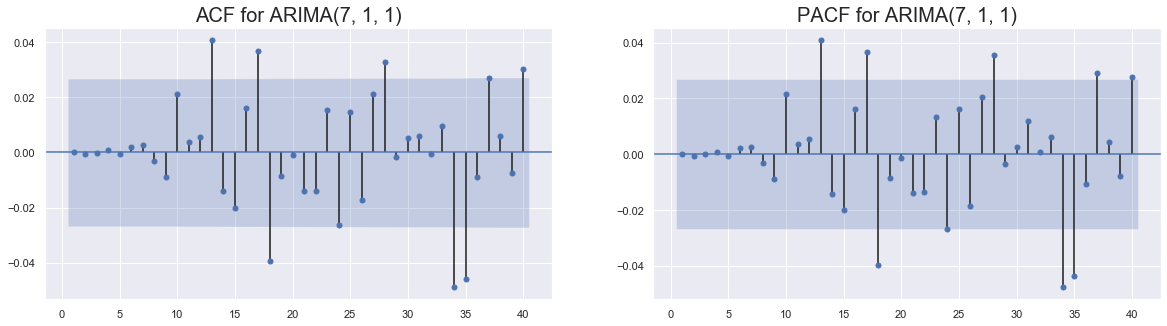

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [17]:
arimax_7_1_1_model_results = fit_arima_model(train_df.spx, "ARIMA(7, 1, 1)", 7, 1, 1, exog_data=train_df.dax)

#### LLR Test to compare ARIMAX(1, 1, 1) and ARIMAX(7, 1, 1)

In [18]:
LLR_test(arimax_1_1_1_model_results, arimax_7_1_1_model_results, DF=6)

0.015

#### Predictions on Test Set

In [19]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [20]:
pred_df_exog = arimax_7_1_1_model_results.predict(start = start_date, end = end_date, exog=test_df.dax)

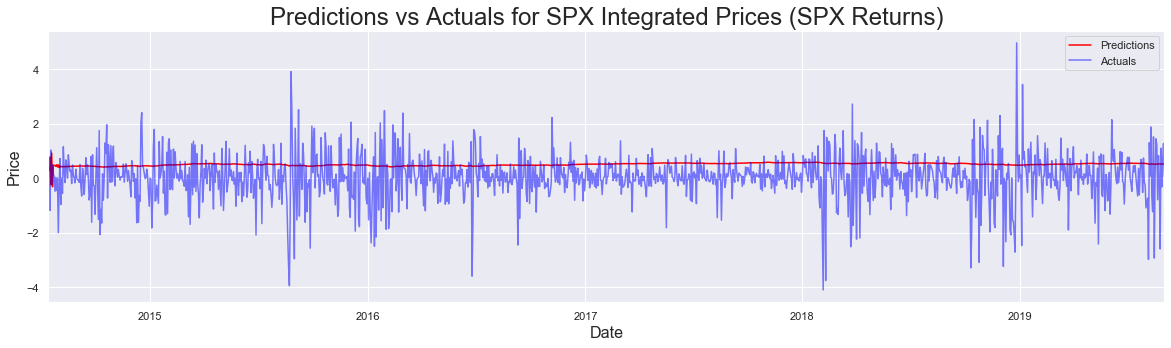

In [21]:
pred_df_exog[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.5)

plt.title("Predictions vs Actuals for SPX Integrated Prices (SPX Returns)", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Price', size=16)

plt.legend()
plt.show()

# Comparing Prediction Accuracies

In [22]:
start, end = test_df.index[0], test_df.index[-1]

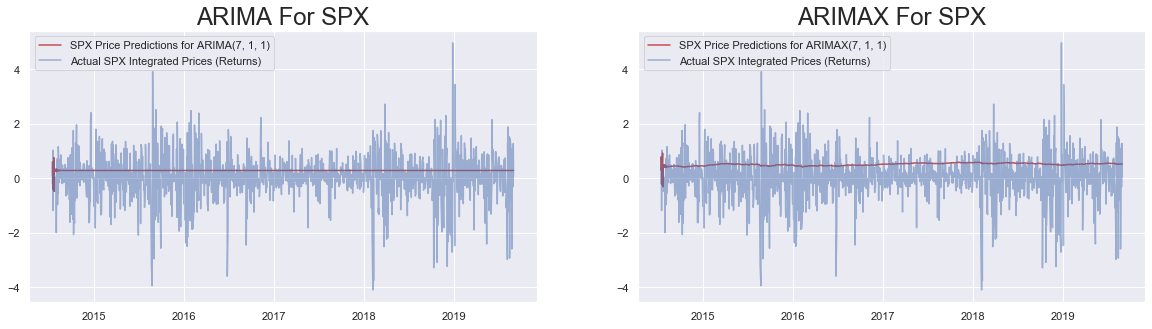

In [23]:
plt.rcParams['figure.figsize'] = 20, 5

fig, ax = plt.subplots(1, 2)

ax[0].plot(pred_df[start:end], color='r', label='SPX Price Predictions for ARIMA(7, 1, 1)')
ax[0].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Integrated Prices (Returns)', alpha=0.5)
ax[0].set_title('ARIMA For SPX', size=24)
ax[0].legend()

ax[1].plot(pred_df_exog[start:end], color='r', label='SPX Price Predictions for ARIMAX(7, 1, 1)')
ax[1].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Integrated Prices (Returns)', alpha=0.5)
ax[1].set_title('ARIMAX For SPX', size=24)
ax[1].legend()

plt.show()

#### RMSE: ARIMA(7, 1, 1) on SPX

In [24]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.8772263797002026


#### RMSE: ARIMA(7, 1, 1) on SPX

In [25]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_exog.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.963885378500191
